In [1]:
# 한글 폰트 적용
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fonm
from matplotlib import font_manager, rc
mpl.rcParams['axes.unicode_minus'] = False
font_path = "C:/Windows/Fonts/정직_1.ttf"
font = fonm.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [13]:
import konlpy
from PIL import Image
filename = 'C:\\Workspace\\python\\Data_Science\dataA\\gift.txt'
maskname = 'C:\\Workspace\\python\\Data_Science\dataA\\heart.jpg'
mask = np.array(Image.open(maskname))
with open(filename, 'r', encoding='UTF-8') as f:
    text = f.read()

In [14]:
from konlpy.tag import Okt
okt = Okt()
tokens = okt.nouns(text)
tokens[:10]

['반지', '목걸이', '커플', '가디건', '커플', '모자', '신지', '몇개', '추천', '제품']

In [19]:
import re
new_tokens = []
for token in tokens:
    gift = re.sub('[A-Za-z0-9]', '', token)
    if gift:
        new_tokens.append(gift)

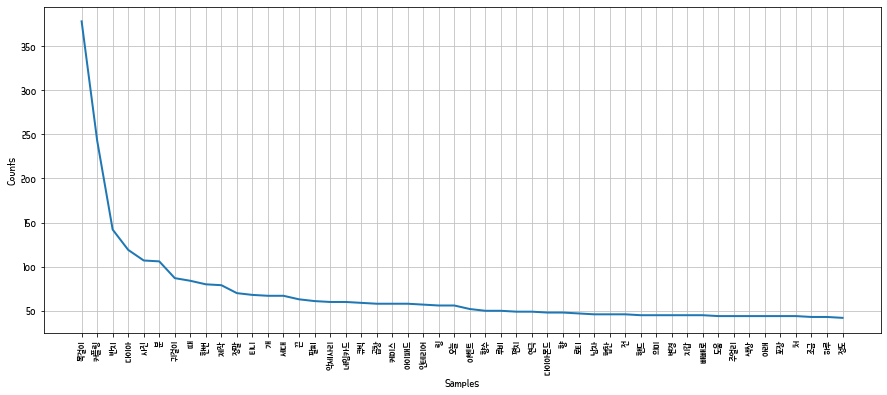

In [29]:
import nltk
gift = nltk.Text(new_tokens, name = '여친선물')
plt.figure(figsize = (15, 6))
gift.plot(50)
plt.show()

['반지', '목걸이', '가디건', '모자', '신지', '몇개', '투척', '클래식', '커플룩', '버핏']


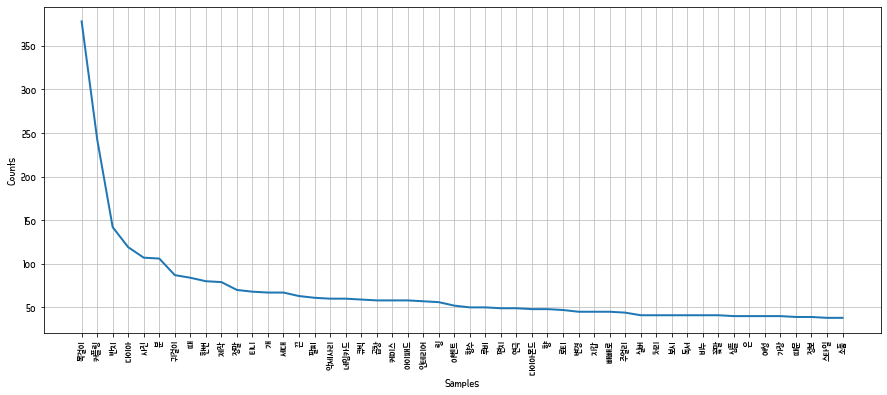

In [32]:
stoptext = '''선물 추천 것 가격 수 제품 저 제 생각 여자 여자친구 사용 요 더 꽃 구매 고급 판매 참고 머리 하나 해 용 준
            디자인 거 네이버 사람 배송 중 후기 감동 여친 하트 커플 가능 사랑 등 인기 상품 직접 브랜드 선택 곳 모양 마감
            요즘 노늘 가지 남녀 그냥 위 페이 마음 부담 오늘 남자 협찬 전 핸드 의미 도움 색상 아래 포장 처 조금 하루 정도'''
stop_words = stoptext.split()
stop_words
new_tokens = [word for word in new_tokens if word not in stop_words]
print(new_tokens[:10])
gift = nltk.Text(new_tokens, name = '여친선물')
plt.figure(figsize = (15, 6))
gift.plot(50)
plt.show()
# 해당 과정을 반복하며 불용어 처리

In [34]:
# 위의 과정을 적절히 반복한 후에 WordCloud로 시각화
from wordcloud import WordCloud
from PIL import Image

In [39]:
data = gift.vocab().most_common(300)
data 


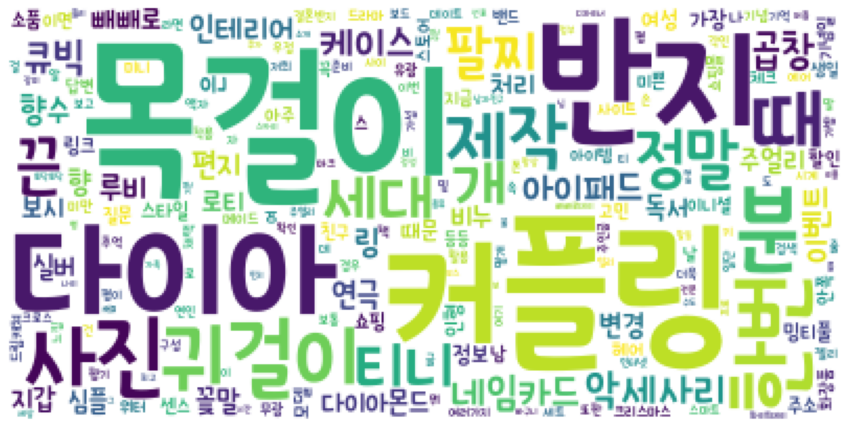

In [51]:
wc = WordCloud(
    font_path = font_path, relative_scaling = 0.2,
    background_color = 'white'
).generate_from_frequencies(dict(data))
plt.figure(figsize = (15, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()

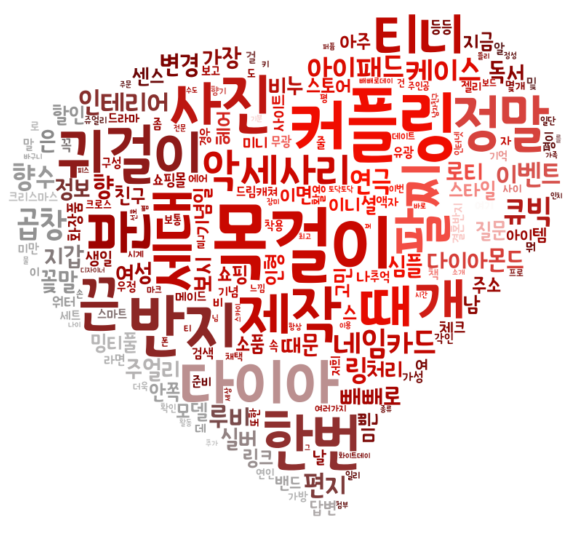

In [54]:
from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)
wc = WordCloud(
        font_path=font_path, relative_scaling=0.2,
        background_color='white', mask=mask,
        min_font_size=1, max_font_size=120
).generate_from_frequencies(dict(data))
plt.figure(figsize=(10,10))
plt.imshow(wc.recolor(color_func=image_colors), 
           interpolation='bilinear')
plt.axis('off')
plt.show()